In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff

from datetime import datetime as dt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 


In [2]:
df = pd.read_csv('Walmart_Store_sales.csv')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [4]:
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [5]:
display(100*df.isnull().sum()/df.shape[0])

Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [6]:
df.dropna(subset='Weekly_Sales', inplace=True) 
display(100*df.isnull().sum()/df.shape[0])

Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     8.088235
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
dtype: float64

In [7]:
df.dtypes

Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [8]:
df['Date'] =  pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         136 non-null    float64       
 1   Date          118 non-null    datetime64[ns]
 2   Weekly_Sales  136 non-null    float64       
 3   Holiday_Flag  125 non-null    float64       
 4   Temperature   121 non-null    float64       
 5   Fuel_Price    124 non-null    float64       
 6   CPI           125 non-null    float64       
 7   Unemployment  122 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 9.6 KB


In [9]:
df['Day_of_week'] = pd.DatetimeIndex(df['Date']).day_of_week
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.drop("Date", axis=1, inplace=True)

In [10]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day_of_week,Day,Month,Year
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,4.0,18.0,2.0,2011.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,4.0,25.0,3.0,2011.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,4.0,28.0,5.0,2010.0
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,4.0,28.0,5.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...
145,14.0,2248645.59,0.0,72.62,2.780,182.442420,8.899,4.0,18.0,6.0,2010.0
146,7.0,716388.81,NaN,20.74,2.778,NaN,NaN,NaN,NaN,NaN,NaN
147,17.0,845252.21,0.0,57.14,2.841,126.111903,NaN,4.0,11.0,6.0,2010.0
148,8.0,856796.10,0.0,86.05,3.638,219.007525,NaN,4.0,12.0,8.0,2011.0


In [11]:
# removal of outliers
valeurs_aberantes = ["Temperature", "CPI", "Fuel_Price", "Unemployment"]

for i in valeurs_aberantes:
    df = df[df[i] < ((df[i].std() * 3) + df[i].mean())]
    df = df[df[i] > ((df[i].std() * 3) - df[i].mean())]

<AxesSubplot: >

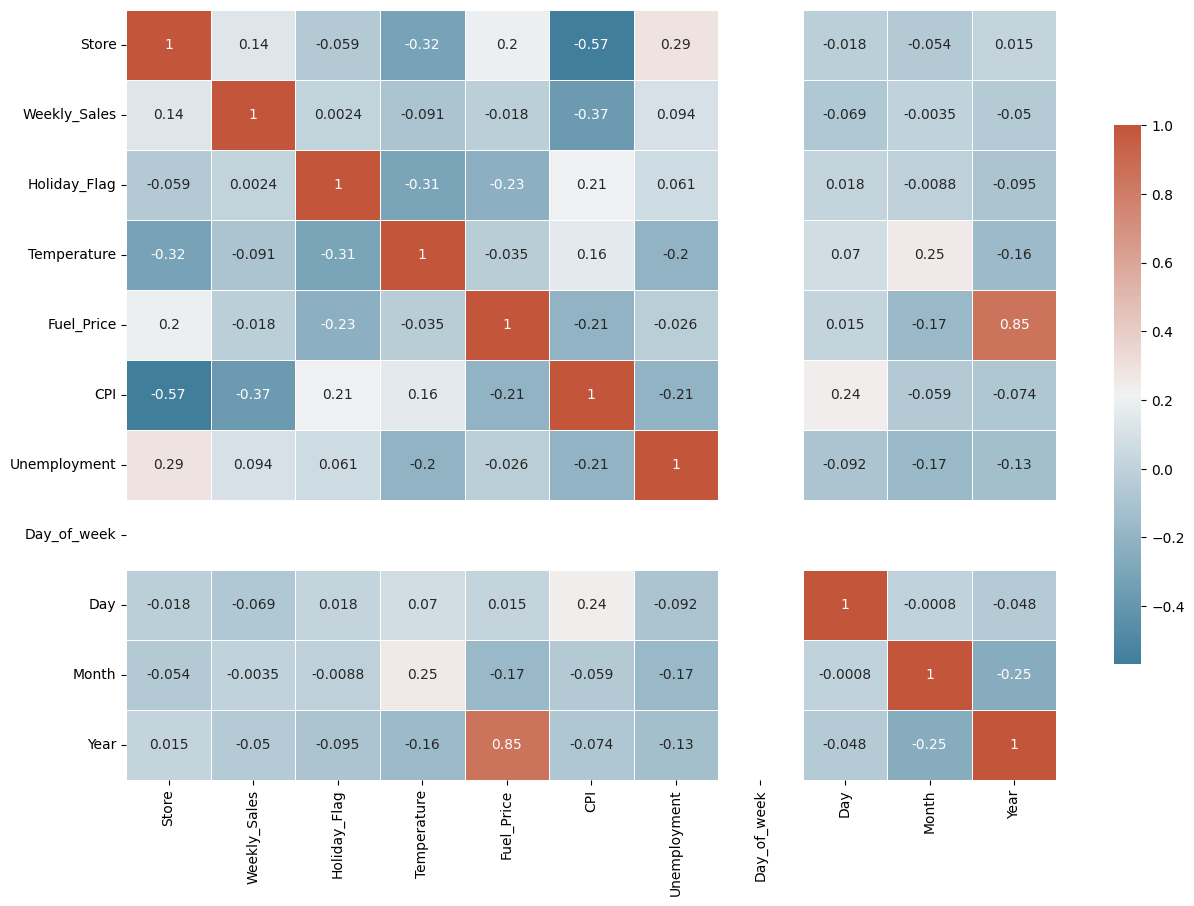

In [13]:
# correlation matrix 
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, cbar_kws={"shrink": .7}, linewidths=.5)

In [14]:
display(100*df.isnull().sum()/df.shape[0])

Store            0.000000
Weekly_Sales     0.000000
Holiday_Flag    11.111111
Temperature      0.000000
Fuel_Price       0.000000
CPI              0.000000
Unemployment     0.000000
Day_of_week     11.111111
Day             11.111111
Month           11.111111
Year            11.111111
dtype: float64

In [15]:
target_name = 'Weekly_Sales'
Y = df.loc[:,target_name]
X = df.drop(target_name, axis = 1)

In [16]:
numeric_features = ["Temperature", "Fuel_Price", "CPI", "Unemployment", "Day_of_week", "Day", "Month", "Year"]
categorical_features = ["Store", "Holiday_Flag"] 

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(drop='first'))  
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [21]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [24]:
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9868327769375977
R2 score on test set :  0.9351220145872654


In [25]:
# recovery of column names for feature evaluation
column_names = []
for name, step, features_list in preprocessor.transformers_: 
    if name == 'num': 
        features = features_list 
    else: 
        features = step.get_feature_names_out() 
    column_names.extend(features) 
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day_of_week', 'Day', 'Month', 'Year', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


In [26]:
coefs = pd.DataFrame(index=column_names, data=model.coef_.transpose(), columns=["coefficients"])
feature_importance = abs(coefs).sort_values(by = 'coefficients')

In [28]:
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, height = 800,
                  margin = {'l': 120} 
                 )
fig.show()


## Let's do a test with a ridge to see what happens?

In [29]:
ridge = Ridge()
ridge.fit(X_train, Y_train)
print('R2 on train: ', ridge.score(X_train, Y_train))
print('R2 on test: ', ridge.score(X_test, Y_test))

R2 on train:  0.932594963872398
R2 on test:  0.8229424400027294


## We have a lower result let's do a test with another parameter and add a cross validation

In [30]:
ridge_regressor = Ridge()

params = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 230, 250,265, 270, 275, 290, 300, 500]
}
best_ridge = GridSearchCV(ridge_regressor, param_grid = params)
best_ridge.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", best_ridge.best_params_)
print("Best R2 score : ", best_ridge.score(X_test, Y_test))

...Done.
Best hyperparameters :  {'alpha': 0.01}
Best R2 score :  0.9387472424418061


In [31]:
print("RIDGE / R2 score on training set : ", best_ridge.score(X_train, Y_train))
print("RIDGE / R2 score on test set : ", best_ridge.score(X_test, Y_test))


RIDGE / R2 score on training set :  0.9860943774773433
RIDGE / R2 score on test set :  0.9387472424418061


## Ok, result that corresponds to the first test, let's look at the features that have the most impact

In [32]:
column_names = []
for name, step, features_list in preprocessor.transformers_: 
    if name == 'num': 
        features = features_list 
    else: 
        features = step.get_feature_names_out() 
    column_names.extend(features) 
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day_of_week', 'Day', 'Month', 'Year', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


In [33]:
best_coefs = pd.DataFrame(index=column_names, data=best_ridge.best_estimator_.coef_.transpose(), columns=["coefficients"])
feature_importance = abs(best_coefs).sort_values(by = 'coefficients')

In [35]:
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, height = 800,
                  margin = {'l': 120} 
                 )
fig.show()

## We see that some features have very little impact, let's do a test without them

In [36]:
df = df.drop(columns=["Day_of_week", "Temperature"], axis=1)

In [37]:
target_name = 'Weekly_Sales'
Y = df.loc[:,target_name]
X = df.drop(target_name, axis = 1)

In [38]:
numeric_features = ["Fuel_Price", "CPI", "Unemployment", "Day", "Month", "Year"]
categorical_features = ["Store", "Holiday_Flag"] 

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [40]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(drop='first'))  
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [43]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [44]:
ridge_regressor = Ridge()

params = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200]
}
best_ridge = GridSearchCV(ridge_regressor, param_grid = params)
best_ridge.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", best_ridge.best_params_)
print("Best R2 score : ", best_ridge.score(X_test, Y_test))

...Done.
Best hyperparameters :  {'alpha': 0.01}
Best R2 score :  0.9381907735590296


In [45]:
print("RIDGE / R2 score on training set : ", best_ridge.score(X_train, Y_train))
print("RIDGE / R2 score on test set : ", best_ridge.score(X_test, Y_test))

RIDGE / R2 score on training set :  0.9855454359728519
RIDGE / R2 score on test set :  0.9381907735590296


In [58]:
Y_train_pred = best_ridge.predict(X_train)
Y_test_pred = best_ridge.predict(X_test)

In [59]:
print("Mean Absolute Error on training set : ", mean_absolute_error(Y_train, Y_train_pred))
print("Mean Fare on training set : ", Y_train.mean())
print()
print("Mean Absolute Error on test set : ", mean_absolute_error(Y_test, Y_test_pred))
print("Mean Fare on test set : ", Y_test.mean())
print("Standard-deviation on test set : ", Y_test.std())

Mean Absolute Error on training set :  57580.761670450265
Mean Fare on training set :  1254297.4449999998

Mean Absolute Error on test set :  109321.3516070401
Mean Fare on test set :  1152132.7650000001
Standard-deviation on test set :  730716.457210535


In [47]:
column_names = []
for name, step, features_list in preprocessor.transformers_: 
    if name == 'num': 
        features = features_list 
    else: 
        features = step.get_feature_names_out() 
    column_names.extend(features) 
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


In [48]:
best_coefs = pd.DataFrame(index=column_names, data=best_ridge.best_estimator_.coef_.transpose(), columns=["coefficients"])

In [49]:
feature_importance = abs(best_coefs).sort_values(by = 'coefficients')

In [50]:
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, height = 800,
                  margin = {'l': 120} 
                 )
fig.show()

## Conclusion

despite the selection of feature the model was not better it would be necessary to test other model or to parameterize